# Minuit

Minuit è un package sviluppado da Fred James al CERN negli anni '70 in fortran, successivamente portato in C++, e recentemente disponibile in python.

È ancora insuperato per una serie di problemi di minimizzazione. Rispetto anche ad altri algoritmi di minimizzazione forniti in ```scipy.optimize``` continua ad essere preferibile per la gran parte dei problemi di fit che possono essere necessari in fisica.

La ricerca del minimo è fatta seguendo i gradiente della funzione intorno ad un insieme di **valori iniziali**. In caso più minimi siano presenti, in genere viene raggiunto quello più vicini ai valori inizali.

È disponibile un tutorial online in diverse parti all'<a href="https://iminuit.readthedocs.io/en/stable/">interfaccia python ```iminuit```</a> sul quale sono basati gli esempi che seguono.

C'è anche una <a href="https://iminuit.readthedocs.io/en/stable/">documentazione ufficiale del modulo</a>.

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import iminuit
from iminuit import Minuit
import math
print(iminuit.__version__)

2.24.0


Costruiamo una nostra funzione di likelihood, e minimizziamola. Consideriamo una PDF gaussiana con $\sigma$ nota, per semplicità.

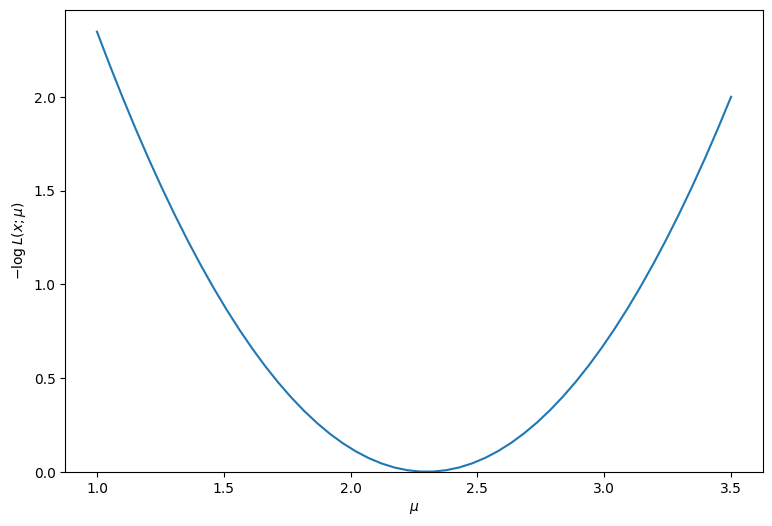

In [2]:
sigma = 0.6
sigma2 = sigma**2
two_sigma2 = 2*sigma2
x_obs = 2.3
def nl_like_fun(mu):
    return (x_obs - mu)**2/two_sigma2
mus = np.linspace(1, 3.5)
plt.figure(figsize=(9,6), dpi=100)
plt.plot(mus, nl_like_fun(mus))
plt.xlabel('$\mu$')
plt.ylabel('$-\log L(x;\mu)$')
plt.ylim(0)
plt.show()

La funzione ```like_fun``` può essere definita come $-\log{\cal{L}}$ oppure come $-2\log{\cal{L}}=\chi^2$. Nei due casi va moltiplicata per in fattore pari a $\frac{1}{2}$ o $1$, perché di default Minuit considera la minimmizzazzione di un $\chi^2$.

In [3]:
Minuit.LIKELIHOOD, Minuit.LEAST_SQUARES

(0.5, 1.0)

In [4]:
nl_like_fun.errordef = Minuit.LIKELIHOOD

In [5]:
mu0 = 1.0
minuit = Minuit(nl_like_fun, mu=mu0)

In [6]:
minuit.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 1.657e-19                  │              Nfcn = 13               │
│ EDM = 1.66e-19 (Goal: 0.0001)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ mu   │    2.3    │    0.6    │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌────┬──────┐
│    │   mu │
├────┼──────┤
│ mu │ 0.36 │
└────┴──────┘

In [7]:
print("starting value {:.3f}, minimum at {:.3f}".format(mu0, minuit.values["mu"]))

starting value 1.000, minimum at 2.300


Da notare che si può usare sia ```minuit.values["mu"]``` (per nome) che ```minuit.values[0]``` (per indice).

In [8]:
print("error: {:.3f}".format(minuit.errors["mu"]))

error: 0.600


L'errore si può calcolare approssimativamente con il calcolo della matrice delle derivate seconde (Hessiano).

In [9]:
minuit.hesse()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 1.657e-19                  │              Nfcn = 18               │
│ EDM = 1.66e-19 (Goal: 0.0001)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ mu   │    2.3    │    0.6    │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌────┬──────┐
│    │   mu │
├────┼──────┤
│ mu │ 0.36 │
└────┴──────┘

In [10]:
print("error: {:.3f}".format(minuit.errors["mu"]))

error: 0.600


In [11]:
minuit.params

,Name,Value,Hesse Error,Minos Error-,Minos Error+,Limit-,Limit+,Fixed
0,mu,2.3,0.6,,,,,


In [12]:
for p in minuit.params:
    print(p.name, "= {:.3f} +/- {:.3f}".format(p.value, p.error))

mu = 2.300 +/- 0.600


In [13]:
repr(minuit.params['mu'])

"Param(number=0, name='mu', value=2.2999999996546254, error=0.6000000000009413, merror=None, is_const=False, is_fixed=False, lower_limit=None, upper_limit=None)"

L'errore si può calcolare più accuratamente con uno scan di $-2\log{\cal L}$.

In [14]:
minuit.minos()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 1.657e-19                  │              Nfcn = 20               │
│ EDM = 1.66e-19 (Goal: 0.0001)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ mu   │    2.3    │    0.6    │    -0.6    │    0.6     │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬───────────────────────┐
│          │          mu           │
├──────────┼───────────┬───────────┤
│  Error   │   -0.6    │    0.6    │
│  Valid   │   True    │   True    │
│ At Limit │   False   │   False   │
│ Max FCN  │   False   │   False   │
│ New Min  │   False   │   False   │
└──────────┴───────────┴───────────┘
┌────┬──────┐
│    │   mu │
├────┼──────┤
│ mu │ 0.36 │
└────┴──────┘

In [15]:
for p in minuit.params:
    print(p.merror)
    print(p.name, "= {:.3f} {:.3f}/+{:.3f}".format(p.value, p.merror[0], p.merror[1]))

(-0.5999999996546256, 0.6000000003453746)
mu = 2.300 -0.600/+0.600


In [16]:
minuit.merrors

┌──────────┬───────────────────────┐
│          │          mu           │
├──────────┼───────────┬───────────┤
│  Error   │   -0.6    │    0.6    │
│  Valid   │   True    │   True    │
│ At Limit │   False   │   False   │
│ Max FCN  │   False   │   False   │
│ New Min  │   False   │   False   │
└──────────┴───────────┴───────────┘

In [17]:
repr(minuit.merrors['mu'])

"<MError number=0 name='mu' lower=-0.5999999996546256 upper=0.6000000003453746 is_valid=True lower_valid=True upper_valid=True at_lower_limit=False at_upper_limit=False at_lower_max_fcn=False at_upper_max_fcn=False lower_new_min=False upper_new_min=False nfcn=2 min=2.2999999996546254>"

In [18]:
minuit.merrors['mu'].lower, minuit.merrors['mu'].upper

(-0.5999999996546256, 0.6000000003453746)

In [19]:
mus= np.linspace(1, 3.5, 100)
mu_hat = minuit.values['mu']
mu_err_lo, mu_err_up = minuit.merrors['mu'].lower, minuit.merrors['mu'].upper

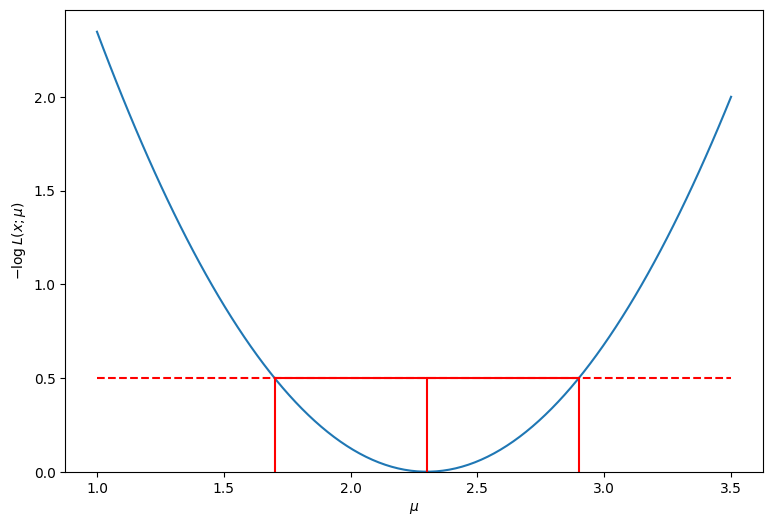

In [20]:
plt.figure(figsize=(9,6), dpi=100)
plt.plot(mus, nl_like_fun(mus))
plt.xlabel('$\mu$')
plt.ylabel('$-\log L(x;\mu)$')
plt.plot((mu_hat,mu_hat), (0, 0.5), color='r')
plt.plot((mu_hat+mu_err_lo,mu_hat+mu_err_lo), (0, 0.5), color='r')
plt.plot((mu_hat+mu_err_up,mu_hat+mu_err_up), (0, 0.5), color='r')
plt.plot((mu_hat+mu_err_lo,mu_hat+mu_err_up), (0.5, 0.5), color='r')
plt.plot((mus[0],mus[-1]), (0.5, 0.5), color='r', linestyle='--')
plt.ylim(0)
plt.show()

## Regressione lineare
Implementiamo un fit lineare ai minimi quadrati usando ```Minuit```.

In [21]:
def line(x, a, b):
    return a*x + b

In [22]:
np.random.seed(1234)
data_x = np.linspace(0, 1, 10)
data_yerr = 0.1  # potremmo anche usare un vettore con errori differenti per ciascun punto
data_y = line(data_x, 2, 1) + data_yerr*np.random.normal(0, 1, len(data_x))

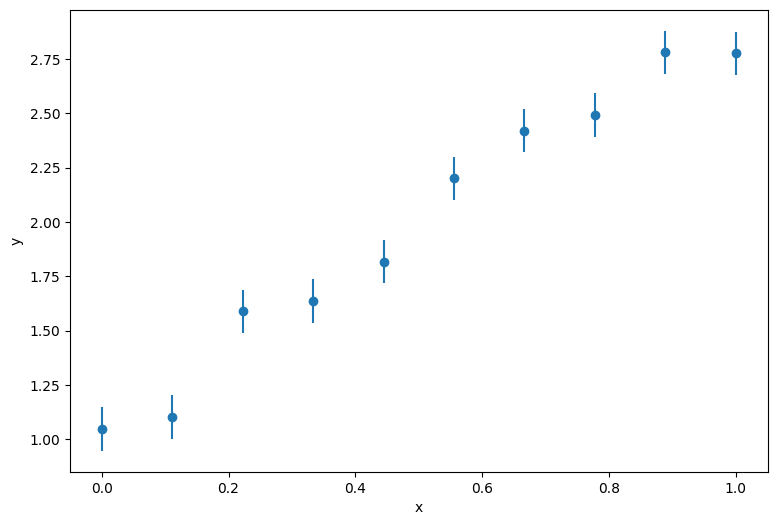

In [23]:
plt.figure(figsize=(9,6), dpi=100)
plt.errorbar(data_x, data_y, data_yerr, fmt="o")
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Usiamo la funzione ```LeastSquares``` che ci fa risparemiare di definire manualmente il $\chi^2$.

<span style="color:blue">Nota: quello che in Minuit viene chiamato ```LeastSquares``` in realtà un modello di $\chi^2$ perché è possibile passare errori che siano diversi tra loro.</span>

In [24]:
from iminuit.cost import LeastSquares
least_squares = LeastSquares(data_x, data_y, data_yerr, line)
m = Minuit(least_squares, a=0, b=0)

In [25]:
m.migrad()  # ricerca del minimo secondo la discesa del gradiente

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 9.703 (χ²/ndof = 1.2)      │              Nfcn = 36               │
│ EDM = 3.18e-23 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │   1.88    │   0.10    │            │            │         │         │       │
│ 1 │ b    │   1.04    │   0.06    │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬─────────────────┐
│   │       a       b │
├───┼─────────────────┤
│ a │ 0.00982 -0.0049 │
│ b │ -0.0049 0.00345 │
└───┴─────────────────┘

In [26]:
m.hesse()   # calcolo accurato delle incertezze

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 9.703 (χ²/ndof = 1.2)      │              Nfcn = 46               │
│ EDM = 2.93e-21 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │   1.88    │   0.10    │            │            │         │         │       │
│ 1 │ b    │   1.04    │   0.06    │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬─────────────────┐
│   │       a       b │
├───┼─────────────────┤
│ a │ 0.00982 -0.0049 │
│ b │ -0.0049 0.00345 │
└───┴─────────────────┘

In [27]:
m.minos()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 9.703 (χ²/ndof = 1.2)      │              Nfcn = 78               │
│ EDM = 2.93e-21 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │   1.88    │   0.10    │   -0.10    │    0.10    │         │         │       │
│ 1 │ b    │   1.04    │   0.06    │   -0.06    │    0.06    │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬───────────────────────┬───────────────────────┐
│          │           a           │           b           │
├──────────┼───────────┬───────────┼───────────┬───────────┤
│  Error   │   -0.1    │    0.1    │   -0.06   │   0.06    │
│  Valid   │   True    │   True    │   True    │   True    │
│ At Limit │   False   │   False   │   False   │   False   │
│ Max FCN  │   False   │   False   │   False   │   False   │
│ New Min  │   False   │   False   │   False   │   False   │
└──────────┴───────────┴───────────┴───────────┴───────────┘
┌───┬─────────────────┐
│   │       a       b │
├───┼─────────────────┤
│ a │ 0.00982 -0.0049 │
│ b │ -0.0049 0.00345 │
└───┴─────────────────┘

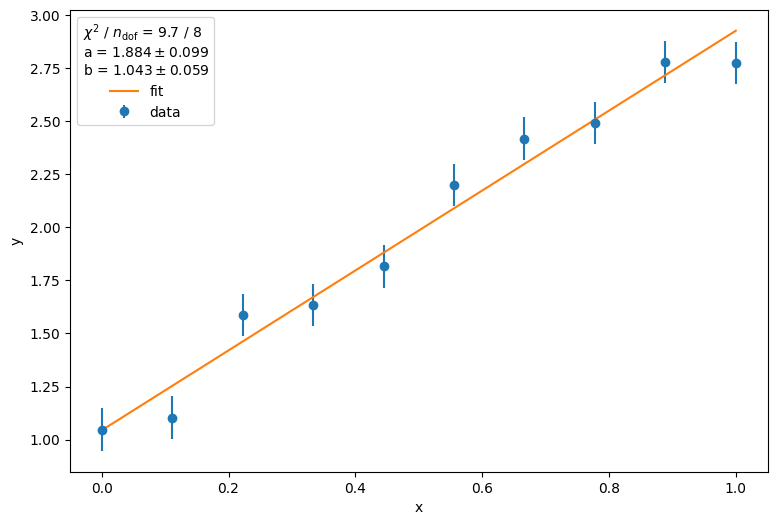

In [28]:
plt.figure(figsize=(9,6), dpi=100)
plt.errorbar(data_x, data_y, data_yerr, fmt="o", label="data")
plt.plot(data_x, line(data_x, *m.values), label="fit")
fit_info = [ f"$\\chi^2$ / $n_\\mathrm{{dof}}$ = {m.fval:.1f} / {len(data_x) - m.nfit}" ]
for p, v, e in zip(m.parameters, m.values, m.errors):
    fit_info.append(f"{p} = ${v:.3f} \\pm {e:.3f}$")
plt.legend(title="\n".join(fit_info))
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Proviamo ora un fit polinomiale.

In [29]:
def poly_line(x, *par):
    return np.polyval(par, x)

In [30]:
least_squares = LeastSquares(data_x, data_y, data_yerr, poly_line)

In [31]:
Minuit(least_squares, *(5, 5), name=('a', 'b'))

,Name,Value,Hesse Error,Minos Error-,Minos Error+,Limit-,Limit+,Fixed
0,a,5.00,0.05,,,,,
1,b,5.00,0.05,,,,,


Di defaut i nomi dei parametri sono ```x0```, ```x1```, ..., ma possono essere cambiati esplicitandoli.

In [32]:
m = Minuit(least_squares, *(5, 5, 5), name=('a', 'b', 'c'))

In [33]:
m.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 7.743 (χ²/ndof = 1.1)      │              Nfcn = 52               │
│ EDM = 1.81e-18 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │   -0.49   │   0.35    │            │            │         │         │       │
│ 1 │ b    │    2.4    │    0.4    │            │            │         │         │       │
│ 2 │ c    │   0.97    │   0.08    │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬─────────────────────────┐
│   │       a       b       c │
├───┼─────────────────────────┤
│ a │   0.124   -0.12   0.018 │
│ b │   -0.12   0.134  -0.023 │
│ c │   0.018  -0.023 0.00618 │
└───┴─────────────────────────┘

In [34]:
m.hesse()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 7.743 (χ²/ndof = 1.1)      │              Nfcn = 68               │
│ EDM = 2.08e-18 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │   -0.49   │   0.35    │            │            │         │         │       │
│ 1 │ b    │    2.4    │    0.4    │            │            │         │         │       │
│ 2 │ c    │   0.97    │   0.08    │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬─────────────────────────┐
│   │       a       b       c │
├───┼─────────────────────────┤
│ a │   0.124   -0.12   0.018 │
│ b │   -0.12   0.134  -0.023 │
│ c │   0.018  -0.023 0.00618 │
└───┴─────────────────────────┘

In [35]:
m.minos()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 7.743 (χ²/ndof = 1.1)      │              Nfcn = 157              │
│ EDM = 2.08e-18 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │   -0.49   │   0.35    │   -0.35    │    0.35    │         │         │       │
│ 1 │ b    │    2.4    │    0.4    │    -0.4    │    0.4     │         │         │       │
│ 2 │ c    │   0.97    │   0.08    │   -0.08    │    0.08    │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬───────────────────────┬───────────────────────┬───────────────────────┐
│          │           a           │           b           │           c           │
├──────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┤
│  Error   │   -0.35   │   0.35    │   -0.4    │    0.4    │   -0.08   │   0.08    │
│  Valid   │   True    │   True    │   True    │   True    │   True    │   True    │
│ At Limit │   False   │   False   │   False   │   False   │   False   │   False   │
│ Max FCN  │   False   │   False   │   False   │   False   │   False   │   False   │
│ New Min  │   False   │   False   │   False   │   False   │   False   │   False   │
└──────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┘
┌───┬─────────────────────────┐
│   │       a       b       c │
├───┼─────────────────────────┤
│ a │   0.124   -0.12   0.018 │
│ b │   -0.12   0.134  -0.023 │
│ c │   0.018  -0.023 0.00618 │
└───┴─────────────────────────┘

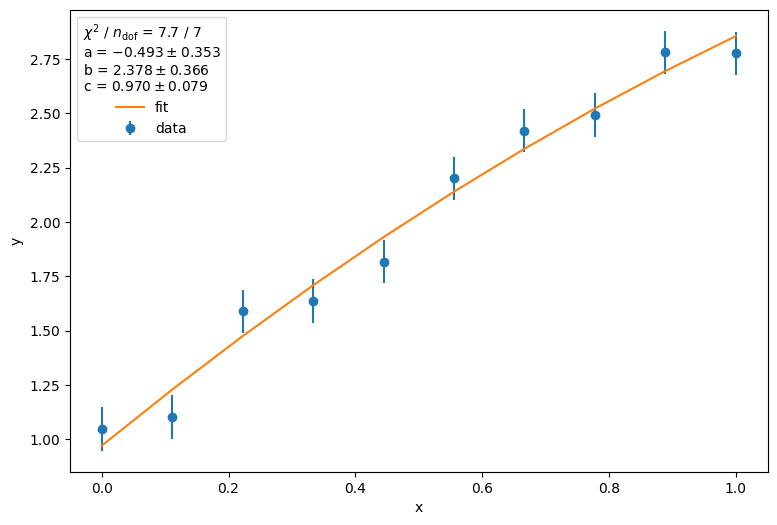

In [36]:
plt.figure(figsize=(9,6), dpi=100)
plt.errorbar(data_x, data_y, data_yerr, fmt="o", label="data")
plt.plot(data_x, poly_line(data_x, *m.values), label="fit")
fit_info = [ f"$\\chi^2$ / $n_\\mathrm{{dof}}$ = {m.fval:.1f} / {len(data_x) - m.nfit}" ]
for p, v, e in zip(m.parameters, m.values, m.errors):
    fit_info.append(f"{p} = ${v:.3f} \\pm {e:.3f}$")
plt.legend(title="\n".join(fit_info))
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Vediamo come ispezionare i parametri

In [37]:
m.params

,Name,Value,Hesse Error,Minos Error-,Minos Error+,Limit-,Limit+,Fixed
0,a,-0.49,0.35,-0.35,0.35,,,
1,b,2.4,0.4,-0.4,0.4,,,
2,c,0.97,0.08,-0.08,0.08,,,


In [38]:
for p in m.params:
    print(repr(p), "\n")

Param(number=0, name='a', value=-0.4934049719639333, error=0.3525090549645118, merror=(-0.35250725325439536, 0.3525072533661846), is_const=False, is_fixed=False, lower_limit=None, upper_limit=None) 

Param(number=1, name='b', value=2.3777573917575676, error=0.3661707102835205, merror=(-0.3661687390117158, 0.36616873908031017), is_const=False, is_fixed=False, lower_limit=None, upper_limit=None) 

Param(number=2, name='c', value=0.9703584079443877, error=0.07862481129839405, merror=(-0.07862453931693263, 0.0786245393044465), is_const=False, is_fixed=False, lower_limit=None, upper_limit=None) 



In [39]:
for p in m.params:
    print(p.name, "= {:.3f} +/- {:.3f}".format(p.value, p.error))

a = -0.493 +/- 0.353
b = 2.378 +/- 0.366
c = 0.970 +/- 0.079


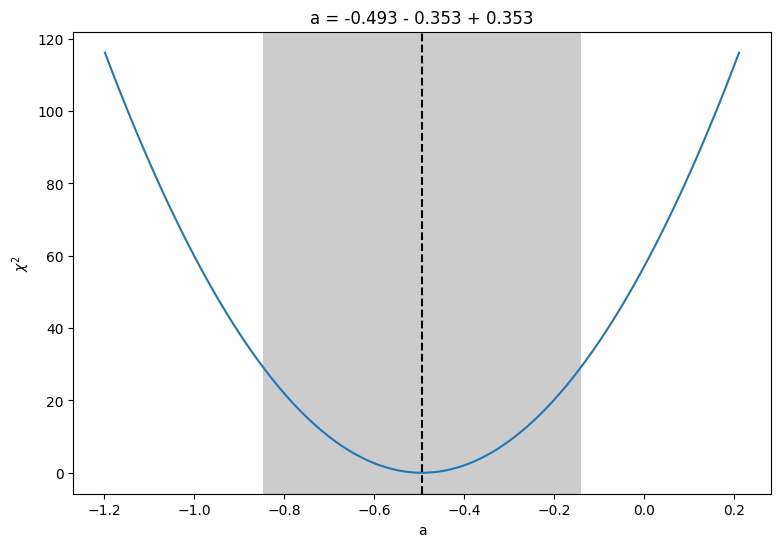

In [40]:
plt.figure(figsize=(9,6), dpi=100)
x, y = m.draw_profile("a")
plt.ylabel("$\chi^2$")
plt.show()

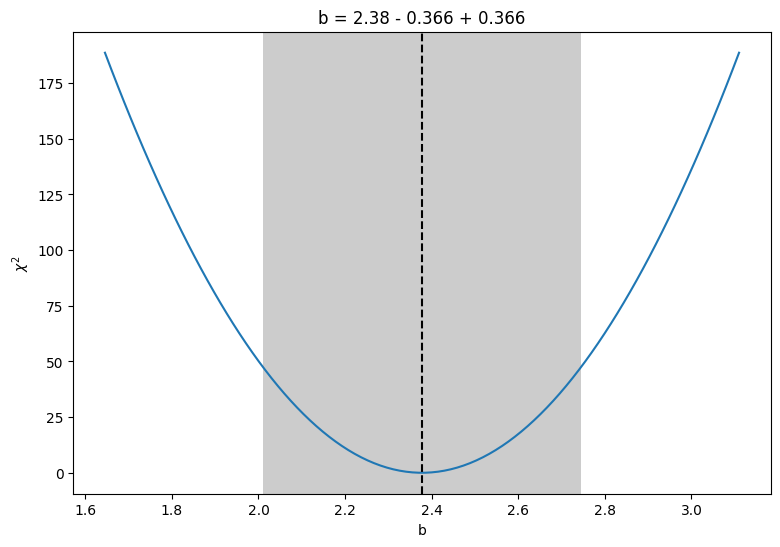

In [41]:
plt.figure(figsize=(9,6), dpi=100)
x, y = m.draw_profile("b")
plt.ylabel("$\chi^2$")
plt.show()

In [42]:
m.covariance

,a,b,c
a,0.124,-0.12 (-0.963),0.018 (0.664)
b,-0.12 (-0.963),0.134,-0.023 (-0.810)
c,0.018 (0.664),-0.023 (-0.810),0.00618


In [43]:
print("err(a) = {:.3f}".format(math.sqrt(m.covariance[0,0])))
print("err(b) = {:.3f}".format(math.sqrt(m.covariance[1,1])))
print("err(c) = {:.3f}".format(math.sqrt(m.covariance[2,2])))
print("cov(a,b) = {:.3f}".format(m.covariance[0,1]))
print("cov(a,c) = {:.3f}".format(m.covariance[0,2]))
print("cov(b,b) = {:.3f}".format(m.covariance[1,2]))

err(a) = 0.353
err(b) = 0.366
err(c) = 0.079
cov(a,b) = -0.124
cov(a,c) = 0.018
cov(b,b) = -0.023


In [44]:
m.covariance.correlation()

,a,b,c
a,1,-1,0.7
b,-1,1,-0.8
c,0.7,-0.8,1


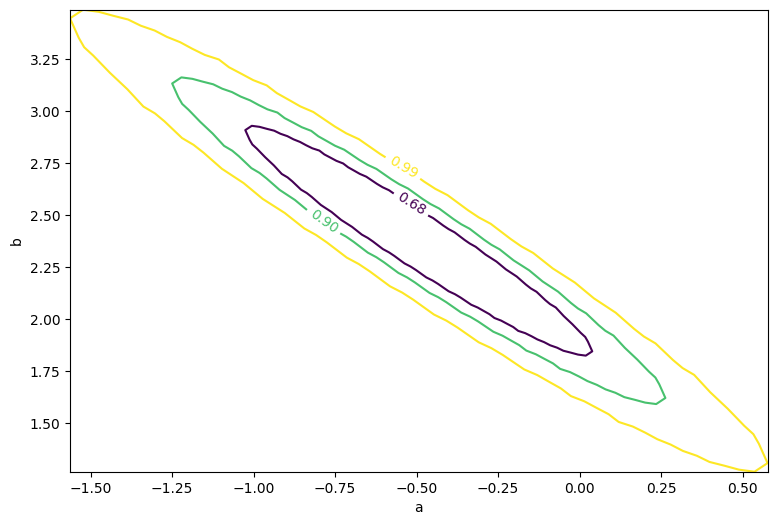

In [45]:
plt.figure(figsize=(9,6), dpi=100)
m.draw_mncontour("a", "b", cl=(0.68, 0.9, 0.99))
plt.show()

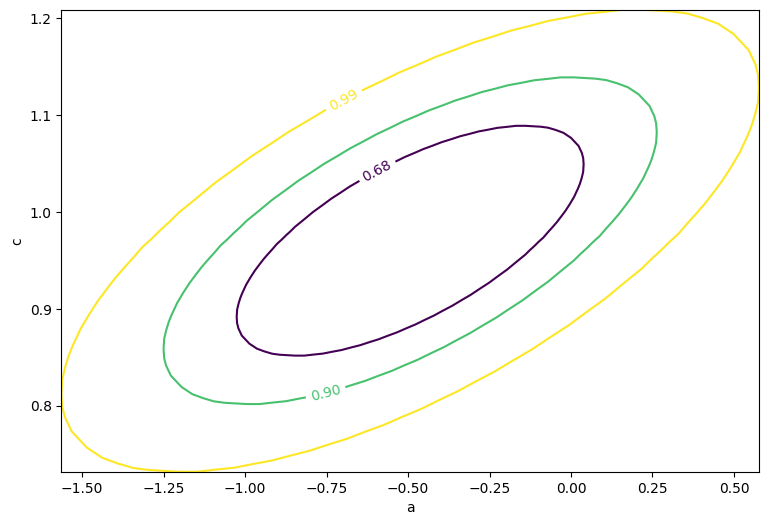

In [46]:
plt.figure(figsize=(9,6), dpi=100)
m.draw_mncontour("a", "c", cl=(0.68, 0.9, 0.99))
plt.show()

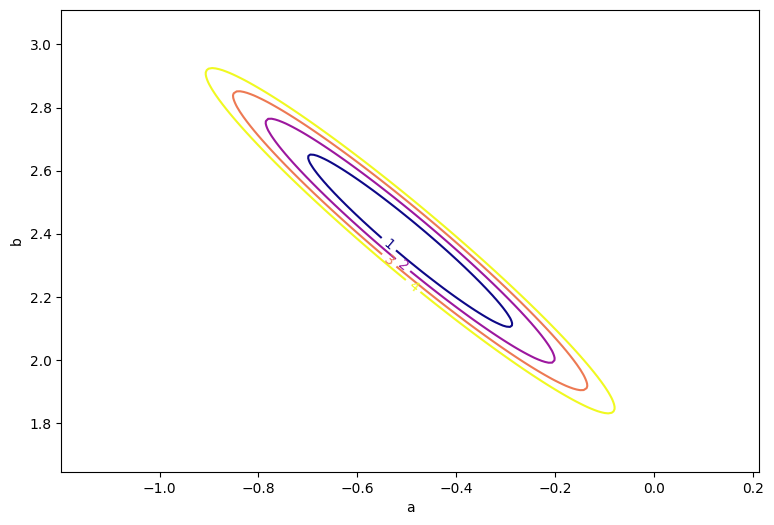

In [47]:
plt.figure(figsize=(9,6), dpi=100)
x, y, z = m.contour("a", "b", subtract_min=True, size=200)
cs = plt.contour(x, y, z, (1, 2, 3, 4), cmap='plasma')
plt.xlabel('a')
plt.ylabel('b')
plt.clabel(cs)
plt.show()

I parametri possono essere costretti entro limiti espliciti.

In [48]:
m.limits = [(0, None), (0, 10), (0, 4)]
m.params

,Name,Value,Hesse Error,Minos Error-,Minos Error+,Limit-,Limit+,Fixed
0,a,0.00,0.35,-0.35,0.35,0,,
1,b,2.4,0.4,-0.4,0.4,0,10,
2,c,0.97,0.08,-0.08,0.08,0,4,


Si può fissare il valore di uno o più parametri.

In [49]:
m.values["a"] = 0
m.fixed["a"] = True
m.params

,Name,Value,Hesse Error,Minos Error-,Minos Error+,Limit-,Limit+,Fixed
0,a,0.00,0.35,-0.35,0.35,0,,yes
1,b,2.4,0.4,-0.4,0.4,0,10,
2,c,0.97,0.08,-0.08,0.08,0,4,


In [50]:
m.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 9.703 (χ²/ndof = 1.2)      │             Nfcn = 52560             │
│ EDM = 1.04e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │   0.00    │   0.35    │   -0.35    │    0.35    │    0    │         │  yes  │
│ 1 │ b    │   1.88    │   0.10    │   -0.37    │    0.37    │    0    │   10    │       │
│ 2 │ c    │   1.04    │   0.06    │   -0.08    │    0.08    │    0    │    4    │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬───────────────────────┬───────────────────────┬───────────────────────┐
│          │           a           │           b           │           c           │
├──────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┤
│  Error   │   -0.35   │   0.35    │   -0.4    │    0.4    │   -0.08   │   0.08    │
│  Valid   │   True    │   True    │   True    │   True    │   True    │   True    │
│ At Limit │   False   │   False   │   False   │   False   │   False   │   False   │
│ Max FCN  │   False   │   False   │   False   │   False   │   False   │   False   │
│ New Min  │   False   │   False   │   False   │   False   │   False   │   False   │
└──────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┘
┌───┬─────────────────────────┐
│   │       a       b       c │
├───┼─────────────────────────┤
│ a │       0    0.00  0.0000 │
│ b │    0.00 0.00982 -0.0049 │
│ c │  0.0000 -0.0049 0.00345 │
└───┴─────────────────────────┘

In [51]:
m.hesse()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 9.703 (χ²/ndof = 1.2)      │             Nfcn = 52570             │
│ EDM = 1.04e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │   0.00    │   0.35    │   -0.35    │    0.35    │    0    │         │  yes  │
│ 1 │ b    │   1.88    │   0.10    │   -0.37    │    0.37    │    0    │   10    │       │
│ 2 │ c    │   1.04    │   0.06    │   -0.08    │    0.08    │    0    │    4    │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬───────────────────────┬───────────────────────┬───────────────────────┐
│          │           a           │           b           │           c           │
├──────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┤
│  Error   │   -0.35   │   0.35    │   -0.4    │    0.4    │   -0.08   │   0.08    │
│  Valid   │   True    │   True    │   True    │   True    │   True    │   True    │
│ At Limit │   False   │   False   │   False   │   False   │   False   │   False   │
│ Max FCN  │   False   │   False   │   False   │   False   │   False   │   False   │
│ New Min  │   False   │   False   │   False   │   False   │   False   │   False   │
└──────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┘
┌───┬─────────────────────────┐
│   │       a       b       c │
├───┼─────────────────────────┤
│ a │       0    0.00  0.0000 │
│ b │    0.00 0.00982 -0.0049 │
│ c │  0.0000 -0.0049 0.00345 │
└───┴─────────────────────────┘

## Funzioni con più minimi


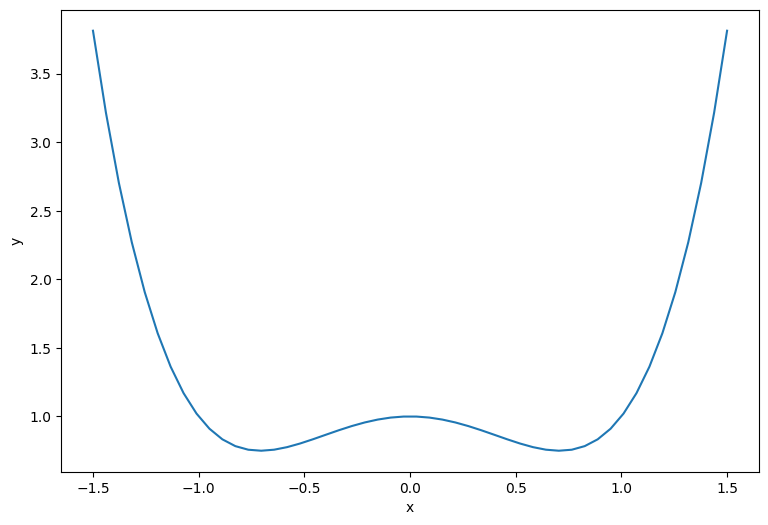

In [52]:
def f2min(x):
    return x ** 4 - x ** 2 + 1

# tratta la funzione come Chi^2 anziché come Likelihood
f2min.errordef = Minuit.LEAST_SQUARES 

plt.figure(figsize=(9,6), dpi=100)
x = np.linspace(-1.5, 1.5)
plt.plot(x, f2min(x))
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [53]:
m = Minuit(f2min, x=-0.1)
m.migrad()
print("starting value -0.1, minimum at", m.values["x"])

starting value -0.1, minimum at -0.7085906080341975


In [54]:
m.values["x"] = 0.1  # m.values[0] = 0.1 also works
m.migrad()
print("starting value +0.1, minimum at", m.values["x"])

starting value +0.1, minimum at 0.708796091342642


# Fit di una funzione generica

In [55]:
import numpy.random as random
def fit_model(x, h, l):
    return h*(1.0 - np.exp(-l*x))
h_true = 50
l_true = 0.3
data_x = np.linspace(1, 20, 21)
data_y0 = fit_model(data_x, h_true, l_true)
data_y = random.poisson(lam=data_y0)
data_yerr = np.sqrt(data_y0)

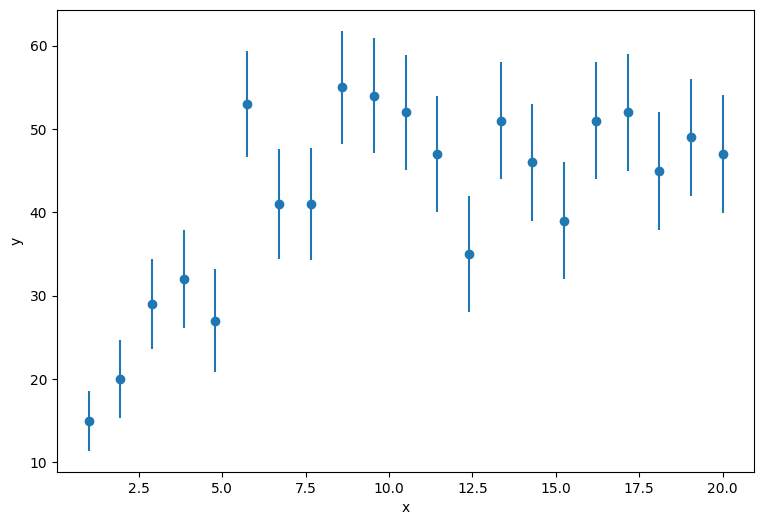

In [56]:
plt.figure(figsize=(9,6), dpi=100)
plt.errorbar(data_x, data_y, data_yerr, fmt="o")
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [57]:
least_squares_mode = LeastSquares(data_x, data_y, data_yerr, fit_model)
m = Minuit(least_squares_mode, h=50, l=1)
m.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 17.57 (χ²/ndof = 0.9)      │              Nfcn = 50               │
│ EDM = 1.96e-07 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ h    │   48.4    │    2.2    │            │            │         │         │       │
│ 1 │ l    │   0.32    │   0.05    │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬─────────────────┐
│   │       h       l │
├───┼─────────────────┤
│ h │    4.75 -0.0735 │
│ l │ -0.0735 0.00265 │
└───┴─────────────────┘

In [58]:
m.hesse()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 17.57 (χ²/ndof = 0.9)      │              Nfcn = 60               │
│ EDM = 1.96e-07 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ h    │   48.4    │    2.2    │            │            │         │         │       │
│ 1 │ l    │   0.32    │   0.05    │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬─────────────────┐
│   │       h       l │
├───┼─────────────────┤
│ h │    4.76 -0.0735 │
│ l │ -0.0735 0.00265 │
└───┴─────────────────┘

In [59]:
m.minos()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 17.57 (χ²/ndof = 0.9)      │              Nfcn = 143              │
│ EDM = 1.96e-07 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ h    │   48.4    │    2.2    │    -2.1    │    2.3     │         │         │       │
│ 1 │ l    │   0.32    │   0.05    │   -0.05    │    0.06    │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬───────────────────────┬───────────────────────┐
│          │           h           │           l           │
├──────────┼───────────┬───────────┼───────────┬───────────┤
│  Error   │   -2.1    │    2.3    │   -0.05   │   0.06    │
│  Valid   │   True    │   True    │   True    │   True    │
│ At Limit │   False   │   False   │   False   │   False   │
│ Max FCN  │   False   │   False   │   False   │   False   │
│ New Min  │   False   │   False   │   False   │   False   │
└──────────┴───────────┴───────────┴───────────┴───────────┘
┌───┬─────────────────┐
│   │       h       l │
├───┼─────────────────┤
│ h │    4.76 -0.0735 │
│ l │ -0.0735 0.00265 │
└───┴─────────────────┘

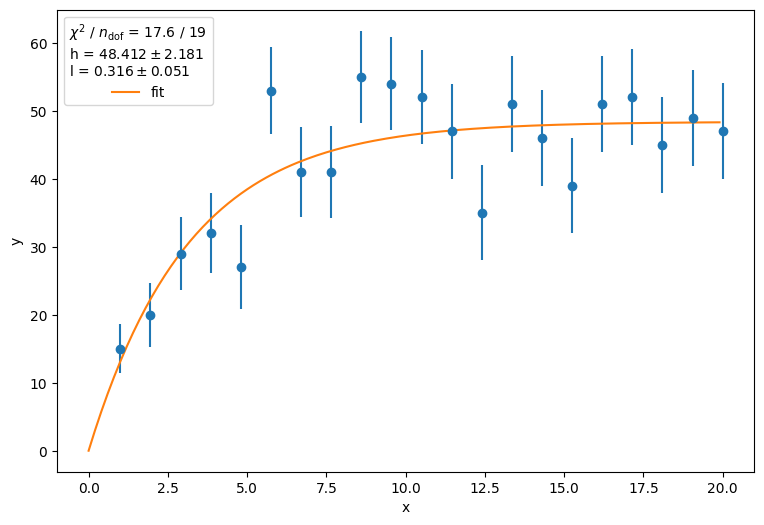

In [60]:
plt.figure(figsize=(9,6), dpi=100)
plt.errorbar(data_x, data_y, data_yerr, fmt="o")
data_x_f = np.arange(0, 20, 0.1)
data_y_f = fit_model(data_x_f, *m.values)
plt.plot(data_x_f, data_y_f, label="fit")
plt.xlabel('x')
plt.ylabel('y')
fit_info = [ f"$\\chi^2$ / $n_\\mathrm{{dof}}$ = {m.fval:.1f} / {len(data_x) - m.nfit}" ]
for p, v, e in zip(m.parameters, m.values, m.errors):
    fit_info.append(f"{p} = ${v:.3f} \\pm {e:.3f}$")
plt.legend(title="\n".join(fit_info))
plt.show()

## Valori inziali

Con gli esempi che abbiamo visto, simulati, *sappiamo* qual è il valore *vero*, ossia quello che abbiamo usato per generare i campioni di dati che abbiamo usato per il fit.

Quando abbiamo campioni di dati veri *non conosciamo* i valori veri. Bisogna quindi provare diversi valori iniziali che si possono determinare approssimativamente dai dati stessi. Non è ovvio che il fit convergerà.

Esistono diverse pratiche usate per trovare i valori iniziali, che potranno essere provate in vari esempi. Come prima cosa, si possono determinare in prima approssimazione alcuni parametri in base ad alcunce caratteristiche. Esempio:
* dove si trova un asintoto (e quindi come questo si riflette nella scelta di uno o più parametri)
* dove si trova un picco e quanto è largo
* quanto vale, approssimativamente, la pendenza di un andamento in approssimazione lineare o esponenziale

Una possibilità è fare il fit di una regione limitata del campione e determinare alcuni parametri che saranno poi usati come valori iniziali.

A volte conviene fissare alcuni parametri, determinarne alcuni, e, solo come ultimo passo, si possono determinare tutti i valori.

Inevitabilmente l'esperienza sarà un fattore importrante per trovare in modo rapido la migliore startegia per i casi pià complicati.